# split and summarize tree canopy change

This notebook sums the area of tree canopy gain, loss, and no change within each 2010 Census Tract and 2010 Neighborhood Tabulation Area.

Reusable components include:
- loading a large geodatabase one sub-area at a time and recursively calculating subtotals on each area.

ToC

1. loads necessary packages
2. loads NTA geometry
2. walks through loading tree canop for a single NTA, clipping shapes to the boundary, and summing the areas
3. loop through all NTAs repeating the above and returning the subtotals
4. does the same for Census Tracts



## 1. load packages

In [6]:
# Instal gdal
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
The following additional packages will be installed:
  python3-numpy
Suggested packages:
  python-numpy-doc python3-nose python3-numpy-dbg
The following NEW packages will be installed:
  python3-gdal python3-numpy
0 upgraded, 2 newly installed, 0 to remove and 39 not upgraded.
Need to get 2,288 kB of archives.
After this operation, 13.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-numpy amd64 1:1.13.3-2ubuntu1 [1,943 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python3-gdal amd64 2.2.3+dfsg-2 [346 kB]
Fetched 2,288 kB in 1s (2,324 kB/s)
Selecting previously unselected package python3-numpy.
(Reading database ... 155335 files and directories currently installed.)
Preparing to unpack .../python3-numpy_

In [7]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [10]:
import os

## 1. load and check NTA shapes

In [ ]:
# set working directory

In [ ]:
##    on computer:
# dir = os.getcwd()
##
##    or in Google Colab:
# dir = '/content/drive/MyDrive/Advanced Spatial/project 1/'

In [19]:
# to load from downloaded file
#
#    from: https://www1.nyc.gov/site/planning/data-maps/open-data/bytes-archive.page?sorts[year]=0
#    file: https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nynta2010_21d.zip

# nta = gpd.read_file(f'{dir}/nynta2010_21d/nynta2010.shp')

# nta.rename(columns={'NTACode':'ntacode'})

In [22]:
# direct load from NYC Open Data

nta = gpd.read_file('https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=GeoJSON')

# reset CRS
nta = nta.to_crs('EPSG:2263')

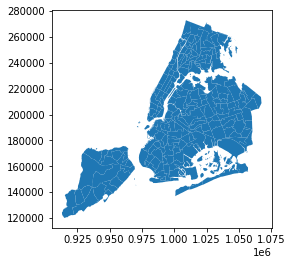

In [16]:
nta.plot()

In [18]:
nta.head()

,ntacode,shape_area,county_fips,ntaname,shape_leng,boro_name,boro_code,geometry
0,QN51,52488277.4492,081,Murray Hill,33266.9048559,Queens,4,"MULTIPOLYGON (((1038593.459 221913.355, 103936..."
1,QN27,19726845.734,081,East Elmhurst,19816.7117581,Queens,4,"MULTIPOLYGON (((1022728.275 217530.808, 102305..."
2,QN41,27774853.5522,081,Fresh Meadows-Utopia,22106.4312724,Queens,4,"MULTIPOLYGON (((1045896.171 205383.934, 104564..."
3,QN08,77412747.8943,081,St. Albans,45401.3167856,Queens,4,"MULTIPOLYGON (((1052996.114 196307.361, 105308..."
4,BK69,20528197.0269,047,Clinton Hill,23971.4662361,Brooklyn,3,"MULTIPOLYGON (((997183.310 187255.551, 997207...."


In [23]:
nta = nta.sort_values('ntacode').set_index('ntacode')

In [24]:
nta.head()

,shape_area,county_fips,ntaname,shape_leng,boro_name,boro_code,geometry
ntacode,,,,,,,
BK09,9985088.07342,047,Brooklyn Heights-Cobble Hill,14264.578478,Brooklyn,3,"MULTIPOLYGON (((986367.735 190549.239, 985813...."
BK17,63346546.3174,047,Sheepshead Bay-Gerritsen Beach-Manhattan Beach,91379.9844185,Brooklyn,3,"MULTIPOLYGON (((1006999.999 152990.449, 100699..."
BK19,17180550.6444,047,Brighton Beach,21058.0640506,Brooklyn,3,"MULTIPOLYGON (((995262.898 153250.430, 995272...."
BK21,38761158.0493,047,Seagate-Coney Island,51828.868274,Brooklyn,3,"MULTIPOLYGON (((991308.054 151730.650, 991307...."
BK23,8738769.02737,047,West Brighton,14113.5815259,Brooklyn,3,"MULTIPOLYGON (((992892.358 148861.161, 992876...."


## 3. sample/test process to masked open, clip, and subtotal canopy area

In [ ]:
check_nta = 'BK0102'

In [ ]:
dir = os.getcwd()

In [ ]:
tree_canopy = gpd.read_file(
    f'{dir} + NYC_TreeCanopyChange_2010_2017.gdb', 
    mask = nta.loc[check_nta, 'geometry'])

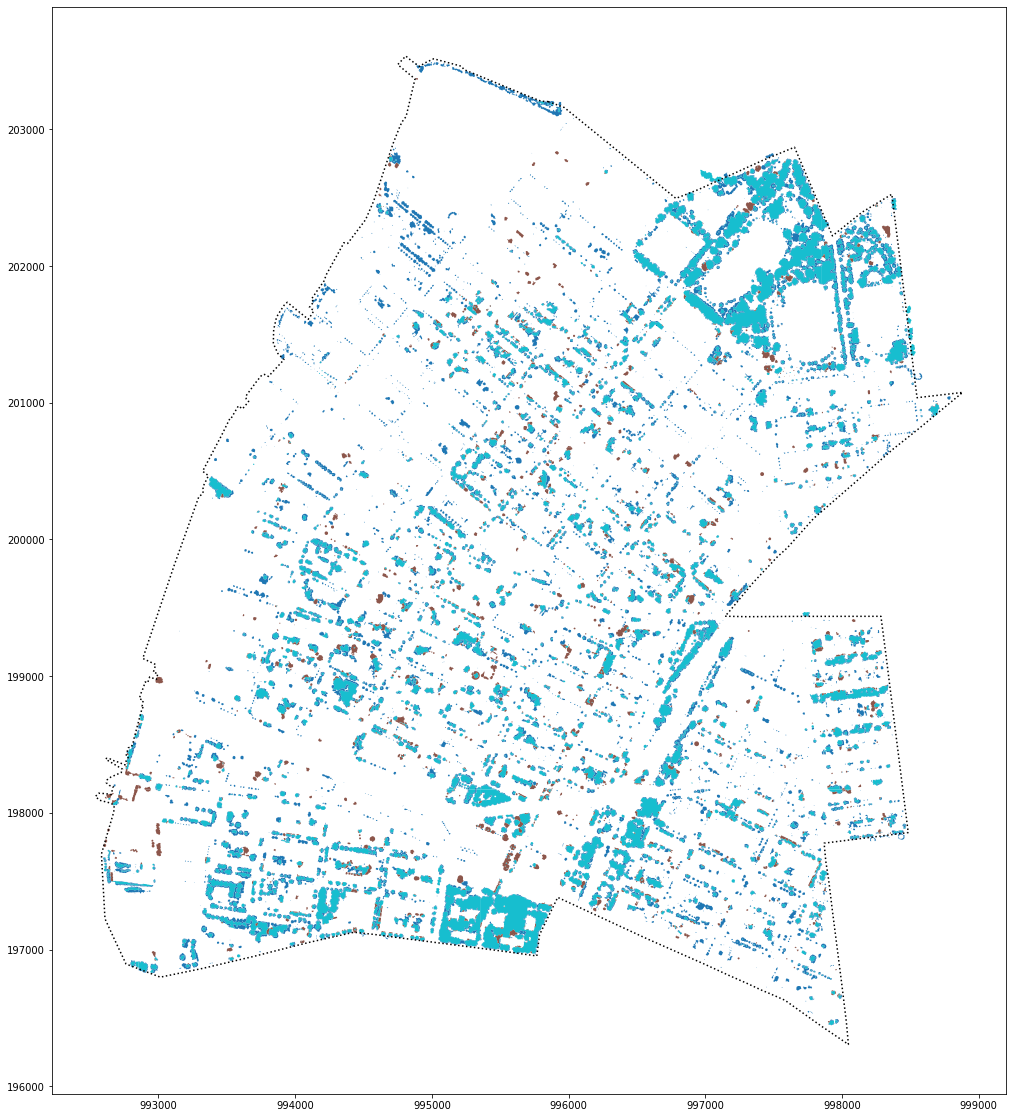

In [ ]:
# check geomoetry loaded

fig,ax = plt.subplots(figsize=(12,12))

# plot tree canopy geometries
tree_canopy.plot(column='Class', ax=ax)   

# compute exterior polygon and plot
x,y = nta.loc[check_nta,'geometry'].exterior.xy
ax.plot(x,y, "k:")


In [ ]:
# clip canopy geometry to border
tree_canopy_clip = tree_canopy.clip(nta.loc[check_nta,'geometry'])

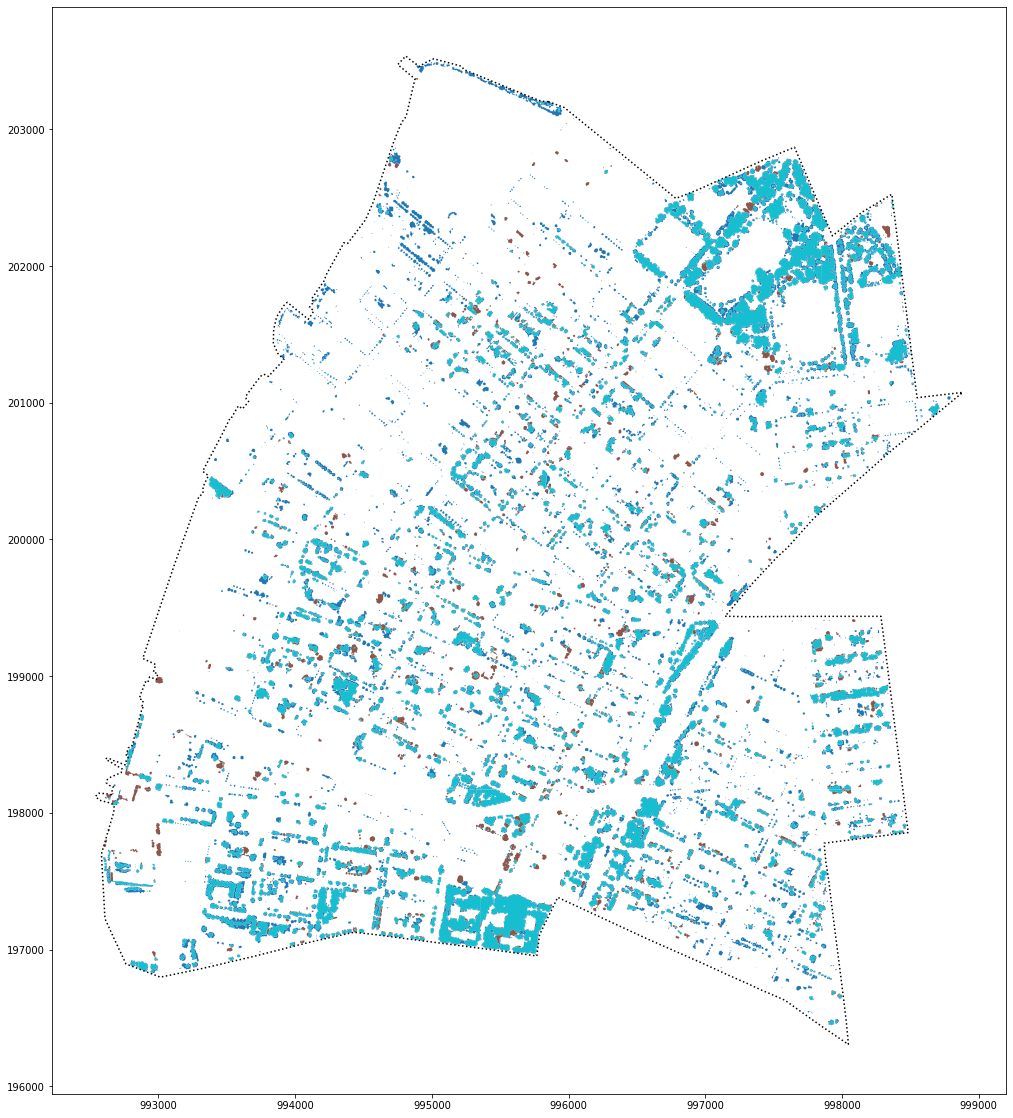

In [ ]:
fig,ax = plt.subplots(figsize=(12,12))

tree_canopy_clip.plot(column='Class',ax=ax)   
x,y = nta.loc[check_nta,'geometry'].exterior.xy
ax.plot(x,y, "k:")

In [ ]:
# group by class and sum

tree_canopy_clip.groupby('Class')['Shape_Area'].sum()

Class
Gain         1.564126e+06
Loss         4.175159e+05
No Change    2.250808e+06
Name: Shape_Area, dtype: float64

In [ ]:
canopy_area_sum = tree_canopy.groupby('Class')['Shape_Area'].sum()

In [ ]:
canopy_area_sum['No Change']

3287953.1250051335

## 4. process all NTAs

In [ ]:
ntas_list = nta.index.to_list()

In [ ]:
%%time

no_change = []
gain = []
loss = []

for i in ntas_list:
    
    # open canopy file intersecting (within) NTA boundary
    nta_canopy = gpd.read_file(f'{dir} + NYC_TreeCanopyChange_2010_2017.gdb',
                               mask=nta.loc[i,'geometry'])
    
    # clip canopy to NTA boundary
    nta_canopy = nta_canopy.clip(nta.loc[i,'geometry'])

    # summarize canopy by class
    nta_canopy_area_sum = nta_canopy.groupby('Class')['Shape_Area'].sum()
    
    # store results
    try:
      no_change.append(nta_canopy_area_sum['No Change'])
    except KeyError:
      no_change.append(0)
    try:
      gain.append(nta_canopy_area_sum['Gain'])
    except KeyError:
      gain.append(0)
    try:
      loss.append(nta_canopy_area_sum['Loss'])
    except KeyError:
      loss.append(0)
    
    # empty memory
    
    nta_canopy = None
    nta_canopy_area_sum = None

CPU times: user 47min 34s, sys: 1min 50s, total: 49min 24s
Wall time: 48min 21s


In [ ]:
canopy_by_nta = pd.DataFrame(
    {'nta':ntas_list, 
     'no_change':no_change,
     'gain':gain, 
     'loss':loss}
)

In [ ]:
# calculate totals and percent gain/loss
canopy_by_nta['total_2010'] = canopy_by_nta['no_change'] + canopy_by_nta['loss']
canopy_by_nta['total_2017'] = canopy_by_nta['no_change'] + canopy_by_nta['gain']

canopy_by_nta['percent_gain'] = canopy_by_nta['gain'] / canopy_by_nta['total_2010']
canopy_by_nta['percent_loss'] = canopy_by_nta['loss'] / canopy_by_nta['total_2010']

In [ ]:
canopy_by_nta.head()

,nta,no_change,gain,loss,total_2010,total_2017,percent_gain,percent_loss
0,BK09,1.803272e+06,6.374755e+05,2.832982e+05,2.086570e+06,2.440748e+06,0.305514,0.135772
1,BK17,8.660154e+06,2.586507e+06,3.507120e+06,1.216727e+07,1.124666e+07,0.212579,0.288242
2,BK19,1.471984e+06,6.126246e+05,9.613306e+05,2.433314e+06,2.084609e+06,0.251765,0.395070
3,BK21,2.007176e+06,1.135529e+06,1.797455e+06,3.804631e+06,3.142705e+06,0.298460,0.472439
4,BK23,1.231623e+06,2.806869e+05,6.838629e+05,1.915486e+06,1.512309e+06,0.146536,0.357018


In [ ]:
canopy_by_nta = canopy_by_nta.set_index('nta')

In [ ]:
nta = nta.join(canopy_by_nta)

In [ ]:
nta.to_file(f'{dir} + nta_2010_with_canopy_sums.geojson')

In [ ]:
# nta = gpd.read_file(f'{dir} + nta_with_canopy_sums.geojson')

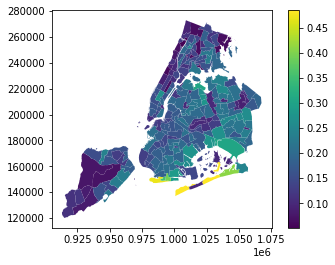

In [ ]:
nta.plot(column='percent_loss', legend=True)

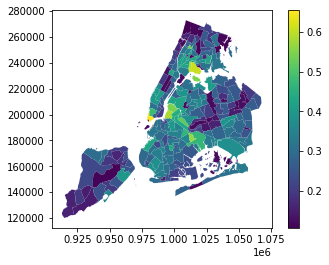

In [ ]:
nta.plot(column='percent_gain', legend=True)

In [ ]:
nta.head()

,NTA2020,OBJECTID,BoroCode,BoroName,CountyFIPS,NTAName,NTAAbbrev,NTAType,CDTA2020,CDTAName,Shape__Area,Shape__Length,no_change,gain,loss,total_2010,total_2017,percent_gain,percent_loss,geometry
0,BK0101,1,3,Brooklyn,047,Greenpoint,Grnpt,0,BK01,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),3.532193e+07,28914.313472,2.205830e+06,1.472226e+06,480988.096343,2.686818e+06,3.678057e+06,0.547944,0.179018,"POLYGON ((1003059.600 204575.035, 1002950.377 ..."
1,BK0102,2,3,Brooklyn,047,Williamsburg,Wllmsbrg,0,BK01,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),2.886227e+07,28155.614604,2.250808e+06,1.564126e+06,417515.874997,2.668324e+06,3.814934e+06,0.586183,0.156471,"POLYGON ((995851.517 203202.341, 995968.794 20..."
2,BK0103,3,3,Brooklyn,047,South Williamsburg,SWllmsbrg,0,BK01,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),1.520934e+07,18252.346180,1.978781e+06,8.865271e+05,345092.392292,2.323874e+06,2.865308e+06,0.381487,0.148499,"POLYGON ((998046.811 196306.333, 998157.502 19..."
3,BK0104,4,3,Brooklyn,047,East Williamsburg,EWllmsbrg,0,BK01,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),5.226632e+07,43171.264182,3.287953e+06,1.655799e+06,584448.749971,3.872402e+06,4.943752e+06,0.427590,0.150927,"POLYGON ((1005302.100 199458.739, 1005307.395 ..."
4,BK0201,5,3,Brooklyn,047,Brooklyn Heights,BkHts,0,BK02,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,9.985438e+06,14337.853843,1.801180e+06,6.221232e+05,283298.249994,2.084478e+06,2.423303e+06,0.298455,0.135908,"POLYGON ((986367.335 190552.246, 985813.435 19..."


In [ ]:
nta['total_2010_per_area'] = nta['total_2010'] / nta['Shape__Area']
nta['total_2017_per_area'] = nta['total_2017'] / nta['Shape__Area']


## 5. process census tracts

In [ ]:
# need to use the 2010 census tract geometries

# downloaded from Census TIGER

ct = gpd.read_file(f'{dir} + tl_2010_36_tract10/tl_2010_36_tract10.shp')

In [ ]:
# filter to NYC (by counties)

ct = ct.loc[ct['COUNTYFP10'].isin(['005','047', '061', '081', '085'])]

In [ ]:
ct.to_crs('EPSG:2263', inplace=True)

In [ ]:
ct = ct.rename(columns={'GEOID10':'GEOID'})

In [ ]:
ct = ct.set_index('GEOID')

In [ ]:
ct_list = ct.index.to_list()

In [ ]:
%%time

no_change = []
gain = []
loss = []

for i in ct_list:
    
    # set tract geomety for maks and clip
    geom = ct.loc[i,'geometry']

    # open canopy file intersecting (within) tract boundary
    ct_canopy = gpd.read_file(f'{dir} + NYC_TreeCanopyChange_2010_2017.gdb',
                               mask=geom)
    
    # clip canopy to tract boundary
    ct_canopy = ct_canopy.clip(geom)

    # summarize canopy by class
    ct_canopy_area_sum = ct_canopy.groupby('Class')['Shape_Area'].sum()
    
    # store results
    try:
      no_change.append(ct_canopy_area_sum['No Change'])
    except KeyError:
      no_change.append(0)
    try:
      gain.append(ct_canopy_area_sum['Gain'])
    except KeyError:
      gain.append(0)
    try:
      loss.append(ct_canopy_area_sum['Loss'])
    except KeyError:
      loss.append(0)
    
    # empty memory
    
    ct_canopy = None
    ct_canopy_area_sum = None

CPU times: user 37min 10s, sys: 2min 8s, total: 39min 18s
Wall time: 41min 38s


In [ ]:
# put results in DataFrame
canopy_by_ct = pd.DataFrame(
    {'ct':ct_list, 
     'no_change':no_change,
     'gain':gain, 
     'loss':loss}
)

In [ ]:
# calculate totals and percent gain/loss
canopy_by_ct['total_2010'] = canopy_by_ct['no_change'] + canopy_by_ct['loss']
canopy_by_ct['total_2017'] = canopy_by_ct['no_change'] + canopy_by_ct['gain']

canopy_by_ct['percent_gain'] = canopy_by_ct['gain'] / canopy_by_ct['total_2010']
canopy_by_ct['percent_loss'] = canopy_by_ct['loss'] / canopy_by_ct['total_2010']

canopy_by_ct['net_change'] = canopy_by_ct['gain'] - canopy_by_ct['loss']

In [ ]:
canopy_by_ct.head()

,ct,no_change,gain,loss,total_2010,total_2017,percent_gain,percent_loss
0,36085001700,1.255777e+06,271162.125001,210827.749994,1.466605e+06,1.526939e+06,0.184891,0.143752
1,36085000600,1.339095e+06,400512.249999,288974.761428,1.628070e+06,1.739607e+06,0.246004,0.177495
2,36085000700,1.328818e+06,359249.124990,255164.999997,1.583983e+06,1.688067e+06,0.226801,0.161091
3,36085001800,2.516473e+06,621947.875003,244040.625001,2.760513e+06,3.138420e+06,0.225302,0.088404
4,36085000300,2.701567e+05,157069.125001,121809.375001,3.919661e+05,4.272259e+05,0.400721,0.310765


In [ ]:
canopy_by_ct = canopy_by_ct.set_index('ct')

In [ ]:
ct = ct.join(canopy_by_ct)

In [ ]:
ct['total_2010_per_area'] = ct['total_2010'] / ct['ALAND10']
ct['total_2017_per_area'] = ct['total_2017'] / ct['ALAND10']


In [ ]:
ct.head()

,STATEFP10,COUNTYFP10,TRACTCE10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry,no_change,gain,loss,total_2010,total_2017,percent_gain,percent_loss,total_2010_per_area,total_2017_per_area
GEOID,,,,,,,,,,,,,,,,,,,,,
36085001700,36,085,001700,17,Census Tract 17,G5020,S,303568,0,+40.6343907,-074.0812548,"POLYGON ((960635.286 170522.891, 960814.558 17...",1.255777e+06,271162.125001,210827.749994,1.466605e+06,1.526939e+06,0.184891,0.143752,4.831224,5.029975
36085000600,36,085,000600,6,Census Tract 6,G5020,S,1046778,1757917,+40.6181527,-074.0626420,"POLYGON ((970625.060 163279.350, 970895.163 16...",1.339095e+06,400512.249999,288974.761428,1.628070e+06,1.739607e+06,0.246004,0.177495,1.555315,1.661868
36085000700,36,085,000700,7,Census Tract 7,G5020,S,632261,532954,+40.6473695,-074.0782043,"POLYGON ((958928.110 175899.531, 959114.429 17...",1.328818e+06,359249.124990,255164.999997,1.583983e+06,1.688067e+06,0.226801,0.161091,2.505267,2.669889
36085001800,36,085,001800,18,Census Tract 18,G5020,S,1043953,1313874,+40.6019091,-074.0537589,"POLYGON ((971385.948 158871.320, 969011.332 15...",2.516473e+06,621947.875003,244040.625001,2.760513e+06,3.138420e+06,0.225302,0.088404,2.644289,3.006285
36085000300,36,085,000300,3,Census Tract 3,G5020,S,584130,1917454,+40.6446304,-074.0719887,"POLYGON ((968643.209 171786.476, 965001.889 17...",2.701567e+05,157069.125001,121809.375001,3.919661e+05,4.272259e+05,0.400721,0.310765,0.671025,0.731388


In [ ]:
# save results

#ct.to_file(f'{dir} + ct_canopy.geojson')

## 5. join in census data

In [ ]:
# read results (in not in memory / if restarting notebook from this point)

# ct = gpd.read_file(f'{dir} + ct_canopy.geojson')

In [ ]:
# race/demographic data (table DP05 (https://data.census.gov/cedsci/table?q=dp05&tid=ACSDP1Y2019.DP05))

In [ ]:
demog_2010 = pd.read_csv(f'{dir} + ACSDP5Y2010/ACSDP5Y2010.DP05_data_with_overlays_2022-02-27T180456.csv', skiprows=[1])

In [ ]:
# slice GEOID to 10 digit code to match geometry

demog_2010['GEOID'] = demog_2010['GEO_ID'].str.slice(-11)

In [ ]:
# load labels to review

demog_2010_labels = pd.read_csv(f'{dir} + ACSDP5Y2010/ACSDP5Y2010.DP05_metadata_2022-02-27T180456.csv', header=0, names=['code','label'])

In [ ]:
demog_2010_labels[~demog_2010_labels['label'].str.contains('Margin of Error')]

,code,label
0,NAME,Geographic Area Name
1,DP05_0001E,Estimate!!SEX AND AGE!!Total population
3,DP05_0001PE,Percent!!SEX AND AGE!!Total population
5,DP05_0002E,Estimate!!SEX AND AGE!!Male
7,DP05_0002PE,Percent!!SEX AND AGE!!Male
...,...,...
315,DP05_0079PE,Percent!!HISPANIC OR LATINO AND RACE!!Not Hisp...
317,DP05_0080E,Estimate!!HISPANIC OR LATINO AND RACE!!Not His...
319,DP05_0080PE,Percent!!HISPANIC OR LATINO AND RACE!!Not Hisp...
321,DP05_0081E,Estimate!!Total housing units


In [ ]:
# choose columns to keep (include 'GEOID')

keep_columns = ['GEOID', 'DP05_0032PE', 'DP05_0033PE', 'DP05_0039PE', 'DP05_0066PE']

In [ ]:
demog_2010 = demog_2010[keep_columns]

In [ ]:
# set data types to numeric

demog_2010.iloc[:,1:] = demog_2010.iloc[:,1:].apply(pd.to_numeric, errors='coerce')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [ ]:
# replace codes with text

demog_2010 = demog_2010.rename(columns = demog_2010_labels.set_index('code').to_dict()['label'])

In [ ]:
# join to census tracts

ct = ct.merge(demog_2010, on='GEOID', how='left', validate='1:1')

In [ ]:
# now housing data (table DP04 https://data.census.gov/cedsci/table?q=dp04&g=0400000US36%241400000&y=2010&tid=ACSDP5Y2010.DP04)

In [ ]:
housing_2010 = pd.read_csv(f'{dir} + ACSDP5Y2010-2/ACSDP5Y2010.DP04_data_with_overlays_2022-01-14T135352.csv', skiprows=[1])

In [ ]:
# slice GEOID to 10 digit code to match geometry

housing_2010['GEOID'] = housing_2010['GEO_ID'].str.slice(-11)

In [ ]:
# load labels to review

housing_2010_labels = pd.read_csv(f'{dir} + ACSDP5Y2010-2/ACSDP5Y2010.DP04_metadata_2022-01-14T135352.csv', header=0, names=['code','label'])

In [ ]:
housing_2010_labels[~housing_2010_labels['label'].str.contains('Margin of Error')]

,code,label
0,NAME,Geographic Area Name
1,DP04_0001E,Estimate!!HOUSING OCCUPANCY!!Total housing units
3,DP04_0001PE,Percent!!HOUSING OCCUPANCY!!Total housing units
5,DP04_0002E,Estimate!!HOUSING OCCUPANCY!!Occupied housing ...
7,DP04_0002PE,Percent!!HOUSING OCCUPANCY!!Occupied housing u...
...,...,...
555,DP04_0139PE,Percent!!GROSS RENT AS A PERCENTAGE OF HOUSEHO...
557,DP04_0140E,Estimate!!GROSS RENT AS A PERCENTAGE OF HOUSEH...
559,DP04_0140PE,Percent!!GROSS RENT AS A PERCENTAGE OF HOUSEHO...
561,DP04_0141E,Estimate!!GROSS RENT AS A PERCENTAGE OF HOUSEH...


In [ ]:
# choose columns to keep (remember to include 'GEOID')

keep_columns = ['GEOID', 'DP04_0001E', 'DP04_0007PE', 'DP04_0017PE', 'DP04_0018PE', 'DP04_0045PE', 'DP04_0046PE', 'DP04_0050PE', 'DP04_0088E', 'DP04_0132E', 'DP04_0140PE']

In [ ]:
housing_2010 = housing_2010[keep_columns]

In [ ]:
# set data types to numeric

housing_2010.iloc[:,1:] = housing_2010.iloc[:,1:].apply(pd.to_numeric, errors='coerce')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1851: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


In [ ]:
# replace codes with text

housing_2010 = housing_2010.rename(columns = housing_2010_labels.set_index('code').to_dict()['label'])

In [ ]:
# aggregate structures since 2000

housing_2010['Percent!!YEAR STRUCTURE BUILT!!2000 or later'] = housing_2010['Percent!!YEAR STRUCTURE BUILT!!Built 2000 to 2004'] + housing_2010['Percent!!YEAR STRUCTURE BUILT!!Built 2005 or later']

In [ ]:
housing_2010 = housing_2010.drop(['Percent!!YEAR STRUCTURE BUILT!!Built 2000 to 2004', 'Percent!!YEAR STRUCTURE BUILT!!Built 2005 or later'], axis=1)

In [ ]:
# join to census tracts

ct = ct.merge(housing_2010, on='GEOID', how='left', validate='1:1')

In [ ]:
ct.head()

,GEOID,STATEFP10,COUNTYFP10,TRACTCE10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry,no_change,gain,loss,total_2010,total_2017,percent_gain,percent_loss,total_2010_per_area,total_2017_per_area,Percent!!RACE!!One race!!White,Percent!!RACE!!One race!!Black or African American,Percent!!RACE!!One race!!Asian,Percent!!HISPANIC OR LATINO AND RACE!!Hispanic or Latino (of any race),Estimate!!HOUSING OCCUPANCY!!Total housing units,"Percent!!UNITS IN STRUCTURE!!1-unit, detached",Percent!!HOUSING TENURE!!Owner-occupied,Percent!!HOUSING TENURE!!Renter-occupied,Percent!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Moved in 2005 or later,Estimate!!VALUE!!Median (dollars),Estimate!!GROSS RENT!!Median (dollars),Percent!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!35.0 percent or more,Percent!!YEAR STRUCTURE BUILT!!2000 or later
0,36085001700,36,085,001700,17,Census Tract 17,G5020,S,303568,0,+40.6343907,-074.0812548,"POLYGON ((960635.286 170522.891, 960814.558 17...",1.255777e+06,271162.125001,210827.749994,1.466605e+06,1.526939e+06,0.184891,0.143752,4.831224,5.029975,60.9,14.4,12.8,43.3,634,22.7,49.8,50.2,25.5,466900.0,965.0,36.7,0.0
1,36085000600,36,085,000600,6,Census Tract 6,G5020,S,1046778,1757917,+40.6181527,-074.0626420,"POLYGON ((970625.060 163279.350, 970895.163 16...",1.339095e+06,400512.249999,288974.761428,1.628070e+06,1.739607e+06,0.246004,0.177495,1.555315,1.661868,80.3,11.3,5.9,22.9,1376,14.1,40.8,59.2,38.3,386100.0,761.0,33.3,7.2
2,36085000700,36,085,000700,7,Census Tract 7,G5020,S,632261,532954,+40.6473695,-074.0782043,"POLYGON ((958928.110 175899.531, 959114.429 17...",1.328818e+06,359249.124990,255164.999997,1.583983e+06,1.688067e+06,0.226801,0.161091,2.505267,2.669889,23.1,52.4,3.1,28.7,2511,2.4,17.0,83.0,34.8,168700.0,919.0,33.0,2.5
3,36085001800,36,085,001800,18,Census Tract 18,G5020,S,1043953,1313874,+40.6019091,-074.0537589,"POLYGON ((971385.948 158871.320, 969011.332 15...",2.516473e+06,621947.875003,244040.625001,2.760513e+06,3.138420e+06,0.225302,0.088404,2.644289,3.006285,79.8,9.2,1.1,31.0,419,8.4,0.0,100.0,65.8,NaN,1238.0,28.7,0.0
4,36085000300,36,085,000300,3,Census Tract 3,G5020,S,584130,1917454,+40.6446304,-074.0719887,"POLYGON ((968643.209 171786.476, 965001.889 17...",2.701567e+05,157069.125001,121809.375001,3.919661e+05,4.272259e+05,0.400721,0.310765,0.671025,0.731388,54.4,13.5,26.6,21.4,991,0.5,36.9,63.1,32.7,345800.0,1055.0,41.4,2.3


In [ ]:
# now income (table S19013 https://data.census.gov/cedsci/table?q=median%20income&g=0400000US36%241400000&y=2010&tid=ACSDT5Y2010.B19013)

In [ ]:
income_2010 = pd.read_csv(f'{dir} + ACSDT5Y2010/ACSDT5Y2010.B19013_data_with_overlays_2022-02-28T124632.csv', skiprows=[1])

In [ ]:
# slice GEOID to 10 digit code to match geometry

income_2010['GEOID'] = income_2010['GEO_ID'].str.slice(-11)

In [ ]:
# load labels to review

income_2010_labels = pd.read_csv(f'{dir} + ACSDT5Y2010/ACSDT5Y2010.B19013_metadata_2022-02-28T124632.csv', header=0, names=['code','label'])

In [ ]:
income_2010_labels[~income_2010_labels['label'].str.contains('Margin of Error')]

,code,label
0,NAME,Geographic Area Name
1,B19013_001E,Estimate!!Median household income in the past ...


In [ ]:
# choose columns to keep (remember to include 'GEOID')

keep_columns = ['GEOID', 'B19013_001E']

In [ ]:
income_2010 = income_2010[keep_columns]

In [ ]:
# set data types to numeric

income_2010.iloc[:,1:] = income_2010.iloc[:,1:].apply(pd.to_numeric, errors='coerce')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [ ]:
# replace codes with text

income_2010 = income_2010.rename(columns = income_2010_labels.set_index('code').to_dict()['label'])

In [ ]:
# join to census tracts

ct = ct.merge(income_2010, on='GEOID', how='left', validate='1:1')

In [ ]:
ct.to_file(f'{dir} + ct_canopy_2010_geom.geojson')

In [ ]:
ct.dtypes

GEOID                                                                                             object
STATEFP10                                                                                         object
COUNTYFP10                                                                                        object
TRACTCE10                                                                                         object
NAME10                                                                                            object
NAMELSAD10                                                                                        object
MTFCC10                                                                                           object
FUNCSTAT10                                                                                        object
ALAND10                                                                                            int64
AWATER10                                               

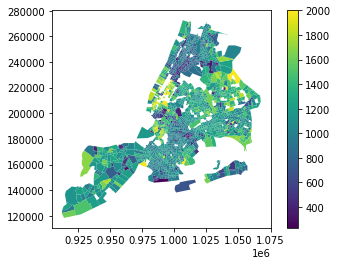

In [ ]:
# test plot

ct.plot(column='Estimate!!GROSS RENT!!Median (dollars)', legend=True)

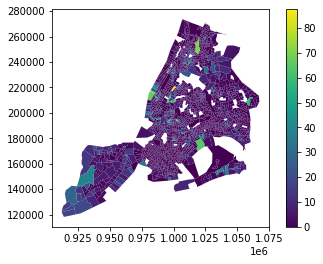

In [ ]:
ct.plot(column='Percent!!YEAR STRUCTURE BUILT!!2000 or later', legend=True)